In [1]:
# -*- coding: utf-8 -*-
# 의사 결정 트리
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 평가 지표(분류)

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def load_data():
  df = sns.load_dataset("tips")

  # 직접 라벨 할당
  df["sex"] = df["sex"].apply(lambda x: 1 if x == "Male" else 0)  
  return df


tips = load_data()


# 데이터 가공(성별을 문자에서 숫자로 변경 0 = Female, 1 = Male) 
y = tips['sex']
X = tips.drop('sex', axis=1)
y

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [3]:
# 훈련 데이터 및 테스트 데이터로 분리 8:2
# 훈련 데이터 및 검증 데이터 분리 6:4
# 훈련 데이터 -> 학습, 검증 데이터 검증 -> 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 데이터 전처리 - 원 핫 인코딩 
categorical_features = ['smoker', 'day', 'time']
numerical_features = ['total_bill', 'tip', 'size']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)


(195, 6) (49, 6) (195,) (49,)


In [4]:
# 모델 만들기 - 하이퍼 파라미터 튜닝을 통해 최적의 파라미터 찾기
model = DecisionTreeClassifier(max_depth=3)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'tip',
                                                   'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['smoker', 'day', 'time'])])),
                ('classifier', DecisionTreeClassifier(max_depth=3))])

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

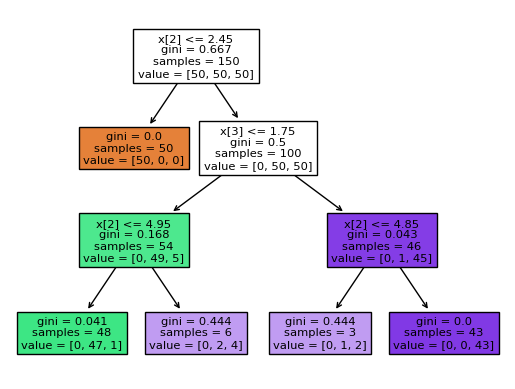

In [5]:
iris = sns.load_dataset('iris')
y = iris.pop('species')
X = iris

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
plt.figure()
plot_tree(clf, filled=True)

모형 예측 및 평가

In [6]:
# Predictions 
y_pred = pipeline.predict(X_test)  # 1 male, 0 female
#y_pred

# 평가 지표 - 최종 모델을 선정하기 위한 기준
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# 모델 업그레이드 
# (1) 데이터 자체를 재 가공 - 효율적이지만 매우 어려움 
# (2) 하이퍼 파라미터 튜닝 - 모델의 성능을 높이기 위해 모델 자체의 파라미터를 조정하는 것

Accuracy: 0.67, Precision: 0.69, Recall: 0.83, F1: 0.76
